In [ ]:
'''
Bayes Classification - input data, split train and test sets,
  train by estimating the parameters for the two class Gaussians
  (mean, sigma, and class probability),then classify the test set.
'''
# Import
import math
import random
import matplotlib.pyplot as plt

TRAINING_FRACTION = 0.7

if __name__ == "__main__":
    
    # Initialization
    data_file_name = 'BayesAssign1_02.csv'
    raw_data = [] # Data in the file without being preprocessed
    train_data = []
    test_data = []
    
    # Import data into raw_data
    with open(data_file_name, 'r') as data_file_ptr:
        for in_item in data_file_ptr:
            in_item = in_item.strip()
            in_item_list = in_item.split(',')
            raw_data.append(in_item_list)
    
    # Randomly select a subset of raw_data to be train_data; the others are selected as test_data
    rand_sample = random.sample(range(len(raw_data)), int(TRAINING_FRACTION * len(raw_data)))
    for i in range(len(raw_data)):
        if i in rand_sample:
            train_data.append(raw_data[i])
        else:
            test_data.append(raw_data[i])
    
    # Estimate parameters for the two class Gaussians
    pos_train = [] # train data with POS class
    neg_train = [] # train data with NEG class
    for i in range(len(train_data)):
        if train_data[i][0] == 'POS':
            pos_train.append(float(train_data[i][1]))
        else:
            neg_train.append(float(train_data[i][1]))
    # Calculate the properties that explain the Gaussian distribution of the two classes
    pos_mean = sum(pos_train) / len(pos_train)
    pos_variance = sum([(pos_train[i] - pos_mean) ** 2 / (len(pos_train) - 1) for i in range(len(pos_train))])
    pos_prob = len(pos_train) / len(train_data)
    neg_mean = sum(neg_train) / len(neg_train)
    neg_variance = sum([(neg_train[i] - neg_mean) ** 2 / (len(neg_train) - 1) for i in range(len(neg_train))])
    neg_prob = len(neg_train) / len(train_data)
    
    # Classify data in test set
    ALPHA = 2 # The normalizing factor
    pos_test = [] # test data that is predicted as POS class
    neg_test = [] # test data that is predicted as NEG class
    total_test = [] 
    temp = []
    for i in range(len(test_data)): # for every test instance
        x = float(test_data[i][1])
        # Calculate the class conditional probility, prior_probability for each class label, and use them to 
        # calculate posterior probability.
        class_conditional_prob_pos = math.exp(-((x - pos_mean) ** 2 / (2 * pos_variance))) / (math.sqrt(math.pi) * pos_variance)
        prior_prob_pos = pos_prob
        class_conditional_prob_neg = math.exp(-((x - neg_mean) ** 2 / (2 * neg_variance))) / (math.sqrt(math.pi) * neg_variance)
        prior_prob_neg = neg_prob        
        p_x = ALPHA
        posterior_prob_pos = class_conditional_prob_pos * prior_prob_pos / p_x
        posterior_prob_neg = class_conditional_prob_neg * prior_prob_neg / p_x
        if (posterior_prob_pos >= posterior_prob_neg):
            pos_test.append(test_data[i])
        else:
            neg_test.append(test_data[i])

    # Evaluation criteria
    total_test.extend(pos_test)
    for i in range(len(total_test)):
        total_test[i].append('POS')
    temp.extend(neg_test)
    for i in range(len(temp)):
        temp[i].append('NEG')
    total_test.extend(temp)
    # Group data instances in order to give the confusion matrix
    TP = [total_test[i] for i in range(len(total_test)) if ((total_test[i][0] == 'POS') and (total_test[i][2] == 'POS'))]
    FP = [total_test[i] for i in range(len(total_test)) if ((total_test[i][0] == 'NEG') and (total_test[i][2] == 'POS'))]
    FN = [total_test[i] for i in range(len(total_test)) if ((total_test[i][0] == 'POS') and (total_test[i][2] == 'NEG'))]
    TN = [total_test[i] for i in range(len(total_test)) if ((total_test[i][0] == 'NEG') and (total_test[i][2] == 'NEG'))]
    accuracy = (len(TP) + len(TN)) / len(total_test)
    sensitivity = len(TP) / (len(TP) + len(FN))
    specificity = len(TN) / (len(FP) + len(TN))
    precision = len(TP) / (len(TP) + len(FP))
    
    # Output result to console
    print("Estimated mean for POS class: " + str(round(pos_mean, 4)))
    print("Estimated mean for NEG class: " + str(round(neg_mean, 4)))
    print("Estimated standard deviation for POS class: " + str(round(math.sqrt(pos_variance), 4)))
    print("Estimated standard deviation for NEG class: " + str(round(math.sqrt(neg_variance), 4)))  
    print("Estimated prior probability of POS class: " + str(round(prior_prob_pos, 4)))
    print("Estimated prior probability of NEG class: " + str(round(prior_prob_neg, 4)))
    print("Percentage of data used for training: " + str(round(len(train_data) / len(raw_data), 4)))
    print("Prevalence of POS data: " + str(round((len(pos_test) / len(test_data)), 4)))
    print("Prevalence of NEG data: " + str(round((len(neg_test) / len(test_data)), 4)))
    print("Accuracy of prediction: " + str(round(accuracy, 4)))
    print("Sensitivity of prediction: " + str(round(sensitivity, 4)))
    print("Specificity of prediction: " + str(round(specificity, 4)))
    print("Precision of prediction: " + str(round(precision, 4)))
    print("The confusion matrix of prediction: ")
    print("True positive: " + str(round(len(TP), 4)))
    print("False positive: " + str(round(len(FP), 4)))
    print("False negative: " + str(round(len(FN), 4)))
    print("True negative: " + str(round(len(TN), 4))) 

Estimated mean for POS class: 2.9789
Estimated mean for NEG class: 0.0368
Estimated standard deviation for POS class: 1.1779
Estimated standard deviation for NEG class: 1.1689
Estimated prior probability of POS class: 0.23
Estimated prior probability of NEG class: 0.77
Percentage of data used for training: 0.7
Prevalence of POS data: 0.2
Prevalence of NEG data: 0.8
Accuracy of prediction: 0.93
Sensitivity of prediction: 0.8
Specificity of prediction: 0.966
Precision of prediction: 0.8667
The confusion matrix of prediction: 
True positive: 52
False positive: 8
False negative: 13
True negative: 227


Text(0.5, 1.0, 'Distribution')

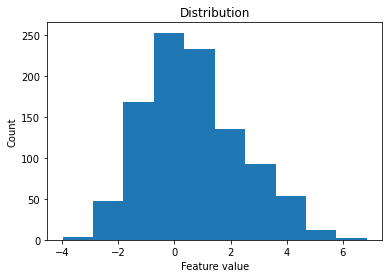

In [ ]:
# Plot histogram of the train data:
x = [float(raw_data[i][1]) for i in range(len(raw_data))]
fig, ax0 = plt.subplots(1, 1)
ax0.hist(x)
ax0.set_xlabel('Feature value')
ax0.set_ylabel('Count')
ax0.set_title('Distribution')

Text(0.5, 1.0, 'NEG Class distribution')

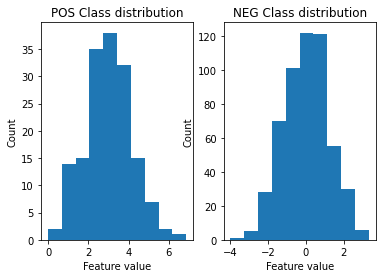

In [ ]:
# Plot the two Gaussian Distribution:
x1 = []
x2 = []
for i in range(len(pos_train)):
    x1.append(pos_train[i])
for i in range(len(neg_train)):
    x2.append(neg_train[i])
    
# Plot using histogram to show the distribution of the two classes
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(x1)
ax1.set_xlabel('Feature value')
ax1.set_ylabel('Count')
ax1.set_title('POS Class distribution')
ax2.hist(x2)
ax2.set_xlabel('Feature value')
ax2.set_ylabel('Count')
ax2.set_title('NEG Class distribution')